### Import Libraries

In [1]:
!pip install wget

You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import warnings, wget
warnings.filterwarnings("ignore")
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py",out="helper_prabowo_ml.py")

from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, remove_digits, lower, email_address, non_ascii, punct, hashtags

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Prepare dataset

In [3]:
import pandas as pd
import os
dataset = pd.DataFrame(columns=['Text','Language'])
for filename in os.listdir('/kaggle/input/lang-data'):
    f = os.path.join('/kaggle/input/lang-data', filename)
    if 'csv' in filename:
        if 'sentences' not in filename:
            df1 = pd.read_csv(f)
            if 'language' in df1.columns:
                df1=df1.rename(columns={'language':'Language'})
            dataset = pd.concat([dataset,df1],axis=0)  

In [4]:
dataset.shape

(45490, 2)

In [5]:
dataset.Language.replace(to_replace=['Portugeese','Sweedish'],value=['Portuguese','Swedish'],inplace=True)

In [6]:
dataset['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portuguese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Swedish', 'Arabic', 'German', 'Kannada', 'Darija',
       'Estonian', 'Thai', 'Japanese', 'Latin', 'Urdu', 'Indonesian',
       'Portugese', 'Chinese', 'Korean', 'Pushto', 'Persian', 'Romanian'],
      dtype=object)

In [7]:
sizes = dict()
for lang in dataset['Language'].unique():
    temp = dataset[dataset['Language']== lang]
    sizes[lang] = temp.shape[0]

In [8]:
temp = pd.read_csv('/kaggle/input/lang-data/sentences.csv')
temp.shape

(10341812, 3)

In [9]:
import json
with open('/kaggle/input/lang-data-json/lan_to_language.json', 'r') as f:
    js_file = json.load(f)

In [10]:
js_ls = []
count = 0
s = []
for lang in sizes.keys():
    if lang in js_file.values():
        count = count + 1
        js_ls.append(lang)
        s.append(sizes[lang])

In [11]:
def get_key(val):
    for key, value in js_file.items():
        if val == value:
            return key

In [12]:
new_s = dict()
for i in js_ls:
    new_s[i] = temp[temp['lan_code']==get_key(i)].shape[0]

In [13]:
f = dict()
for i in new_s.keys():
    if i in sizes.keys():
        t = new_s[i] + sizes[i]
    if t > 10000:
        f[i] = t

In [14]:
dataset = dataset.rename(columns={'Text':'sentence'})

In [15]:
type(f)

dict

In [16]:
l=[]
for lan in f.keys():
    temp1 = dataset[dataset['Language']==lan]['sentence']
    temp2 = temp[temp['lan_code']==get_key(lan)]['sentence']
    final = pd.DataFrame(columns=['sentence','language'])
    final['sentence'] = pd.concat([temp1,temp2])
    final = final.assign(language=lan)
    final = final.reset_index(drop=True)
    l.append(final)

In [17]:
import random
final_data = pd.DataFrame(columns=['sentence','language'])
for i in range(len(l)):
    n = random.randrange(10000,14000)
    t = l[i].sample(n=n,replace=False)
    final_data = pd.concat([final_data,t])

In [18]:
from sklearn.utils import shuffle
final_data = shuffle(final_data)
dataset = final_data.reset_index(drop=True)

In [19]:
dataset.shape

(207565, 2)

### Visualizations

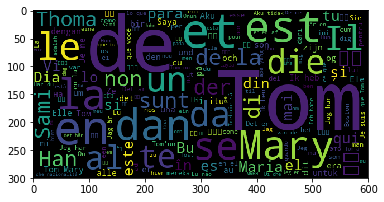

In [20]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
wc = WordCloud(width=600,height=300,random_state=42).generate(' '.join(dataset.sentence))
plt.imshow(wc);

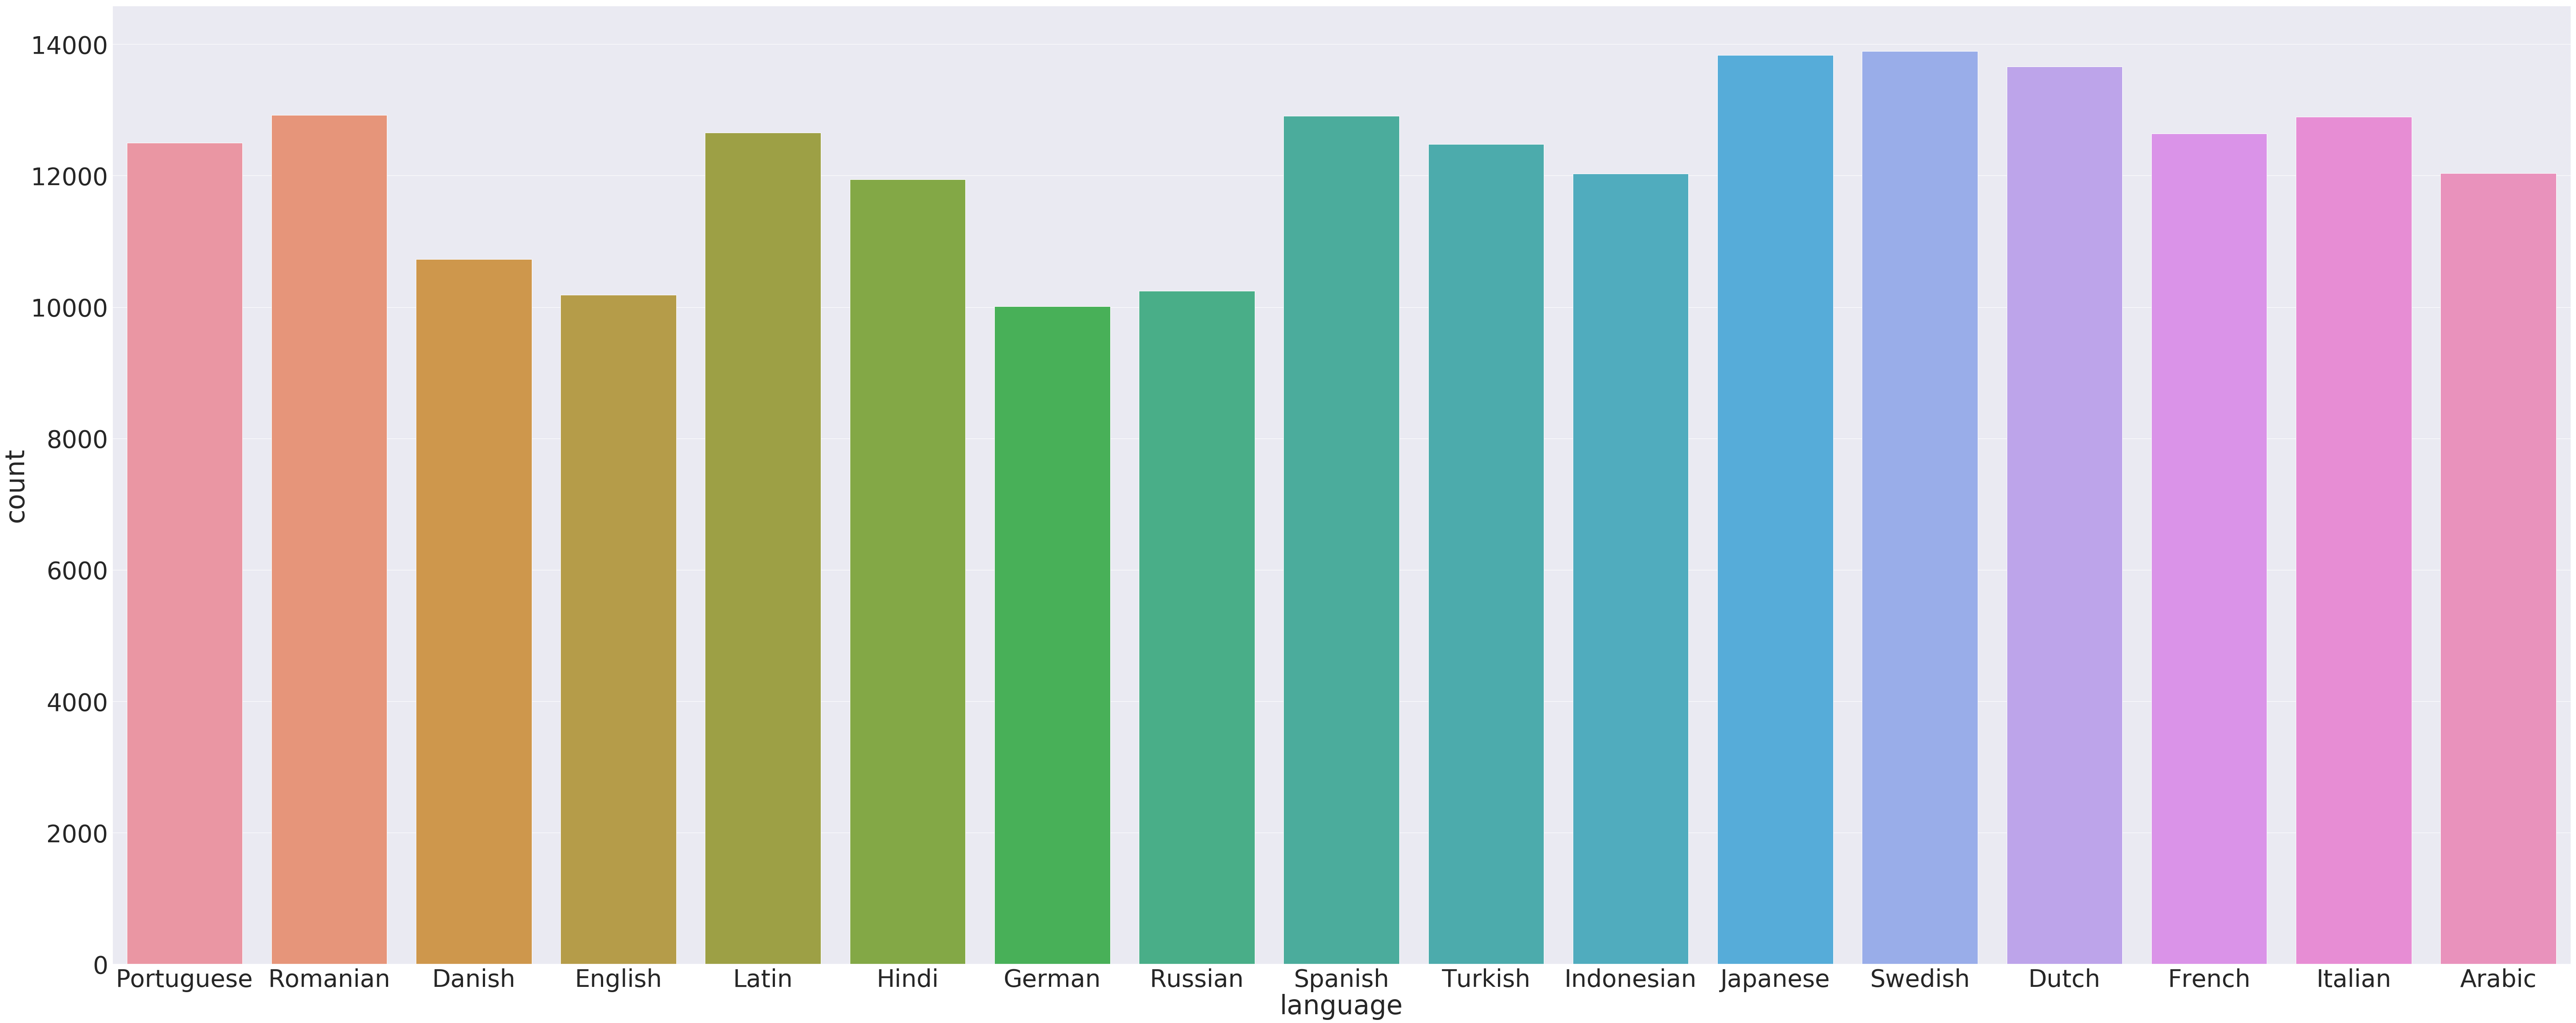

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=30)
sns.set(rc={'figure.figsize':(100,40)})
sns.set(font_scale=5)
sns.countplot(dataset.language)
#plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x731f5554fa58>,
 'caps': [<matplotlib.lines.Line2D at 0x731f56b8ad68>,
 'boxes': [<matplotlib.lines.Line2D at 0x731f5554fdd8>],
 'medians': [<matplotlib.lines.Line2D at 0x731f56b8a3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x731f571aedd8>],
 'means': []}

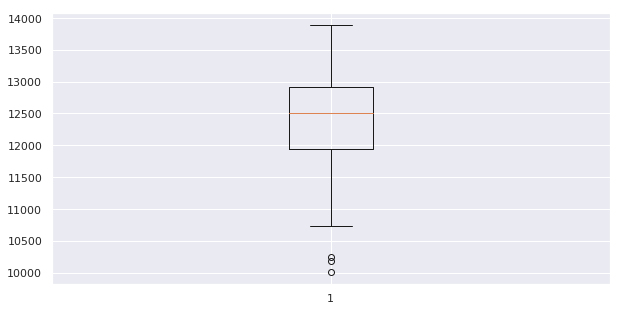

In [22]:
sizes = []
for lang in dataset['language'].unique():
    temp = dataset[dataset['language']== lang]
    sizes.append(temp.shape[0])

sns.set(font_scale=30)
sns.set(rc={'figure.figsize':(10,5)})
plt.boxplot(sizes)

### Saving dataset

In [23]:
dataset.to_csv('/kaggle/working/final_data.csv')

In [24]:
dataset.shape

(207565, 2)

### Pre-processing

In [25]:
# def text_preprocess(data,col):
#     data[col] = data[col].apply(func=clean_html)
#     #data[col] = data[col].apply(func=remove_)
#     data[col] = data[col].apply(func=removeStopWords)
#     data[col] = data[col].apply(func=remove_digits)
#     data[col] = data[col].apply(func=remove_links)
#     #data[col] = data[col].apply(func=remove_special_characters)
#     data[col] = data[col].apply(func=punct)
#     #data[col] = data[col].apply(func=non_ascii)
#     data[col] = data[col].apply(func=email_address)
#     data[col] = data[col].apply(func=lower)
#     return data

In [26]:
# dataset = text_preprocess(dataset,'sentence')
# dataset.head()

### Seperate features and target

In [27]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
text = dataset.sentence
language = dataset.language
train_features, test_features, train_labels, test_labels = train_test_split(text, language, test_size=0.20, random_state=5)

In [28]:
print('lenght of training data = ',len(train_features))
print('lenght of test data = ', len(test_features))

lenght of training data =  166052
lenght of test data =  41513


### Feature Extraction
The features were extracted using sklearn CountVectorizer

In [29]:
from sklearn.feature_extraction.text import*
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [30]:
#uni gram
uni_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_uni = uni_vector.fit_transform(train_features)
bag_of_words_uni.shape

(166052, 1000)

In [31]:
#bigram
bi_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(2,2), max_features=1000)
bag_of_words_bi = bi_vector.fit_transform(train_features)

In [32]:
#trigram
tri_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_tri = tri_vector.fit_transform(train_features)

In [33]:
#3chargram
char3_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_char3 = char3_vector.fit_transform(train_features)

In [34]:
#4chargram
char4_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(4,4), max_features=1000)
bag_of_words_char4 = char4_vector.fit_transform(train_features)

In [35]:
#5chargram
# char5_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
#                           stop_words=None, ngram_range=(5,5), max_features=1000)
# bag_of_words_char5 = char5_vector.fit_transform(train_features)

In [36]:
#6chargram
# char6_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
#                           stop_words=None, ngram_range=(6,6), max_features=1000)
# bag_of_words_char6 = char6_vector.fit_transform(train_features)

In [37]:
#7chargram
# char7_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
#                           stop_words=None, ngram_range=(7,7), max_features=1000)
# bag_of_words_char7 = char7_vector.fit_transform(train_features)

In [38]:
#8chargram
# char8_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
#                           stop_words=None, ngram_range=(1,1), max_features=1000)
# bag_of_words_char8 = char8_vector.fit_transform(train_features)

In [39]:
#9chargram
# char9_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
#                           stop_words=None, ngram_range=(9,9), max_features=1000)
# bag_of_words_char9 = char9_vector.fit_transform(train_features)

In [40]:
#10chargram
# char10_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
#                           stop_words=None, ngram_range=(10,10), max_features=1000)
# bag_of_words_char10 = char10_vector.fit_transform(train_features)

In [41]:
# Get feature names
uni_feature_names = uni_vector.get_feature_names()
bi_feature_names = bi_vector.get_feature_names()
tri_feature_names = tri_vector.get_feature_names()
char3_feature_names = char3_vector.get_feature_names()
char4_feature_names = char4_vector.get_feature_names()
# char5_feature_names = char5_vector.get_feature_names()
# char6_feature_names = char6_vector.get_feature_names()
# char7_feature_names = char7_vector.get_feature_names()
# char8_feature_names = char8_vector.get_feature_names()
# char9_feature_names = char9_vector.get_feature_names()
# char10_feature_names = char10_vector.get_feature_names()

In [42]:
uni_train_features=pd.DataFrame(bag_of_words_uni.toarray(), columns=uni_feature_names)
uni_train_features[:5]

,1,2,a,aan,ab,aber,about,aceasta,acest,ad,ada,adalah,af,ai,aici,ainda,akan,aku,al,aldrig,algo,all,alla,alle,alles,als,am,ama,an,anak,and,anda,andare,andate,andiamo,ani,anno,anos,ao,apa,...,य,यक,यम,यह,र,रक,रण,रत,रम,रय,रव,रस,रह,रहत,ल,लग,लगत,लत,लन,व,वर,वल,वह,श,शन,ष,षण,स,सक,सकत,सन,सबस,सभ,सम,समय,सर,ह,हत,हम,हर
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
bi_train_features=pd.DataFrame(bag_of_words_bi.toarray(), columns=bi_feature_names)
tri_train_features=pd.DataFrame(bag_of_words_tri.toarray(), columns=tri_feature_names)
char3_train_features=pd.DataFrame(bag_of_words_char3.toarray(), columns=char3_feature_names)
char4_train_features=pd.DataFrame(bag_of_words_char4.toarray(), columns=char4_feature_names)
# char5_train_features=pd.DataFrame(bag_of_words_char5.toarray(), columns=char5_feature_names)
# char6_train_features=pd.DataFrame(bag_of_words_char6.toarray(), columns=char6_feature_names)
# char7_train_features=pd.DataFrame(bag_of_words_char7.toarray(), columns=char7_feature_names)
# char8_train_features=pd.DataFrame(bag_of_words_char8.toarray(), columns=char8_feature_names)
# char9_train_features=pd.DataFrame(bag_of_words_char9.toarray(), columns=char9_feature_names)
# char10_train_features=pd.DataFrame(bag_of_words_char10.toarray(), columns=char10_feature_names)

### Applying RandomForestClassifier on train dataset

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc_uni = RandomForestClassifier()                      
rfc_uni.fit(uni_train_features, train_labels);
print("Done-uni")
rfc_bi = RandomForestClassifier()                      
rfc_bi.fit(bi_train_features, train_labels);
print("Done-bi")
rfc_tri = RandomForestClassifier()                      
rfc_tri.fit(tri_train_features, train_labels);
print("Done-tri")
rfc_char3 = RandomForestClassifier()                      
rfc_char3.fit(char3_train_features, train_labels);
print("Done-char3")
rfc_char4 = RandomForestClassifier()                      
rfc_char4.fit(char4_train_features, train_labels);
print("Done-char4")
#rfc_char5 = RandomForestClassifier()                      
#rfc_char5.fit(char5_train_features, train_labels);

# rfc_char6 = RandomForestClassifier()                      
# rfc_char6.fit(char6_train_features, train_labels);

# rfc_char7 = RandomForestClassifier()                      
# rfc_char7.fit(char7_train_features, train_labels);

# rfc_char8 = RandomForestClassifier()                      
# rfc_char8.fit(char8_train_features, train_labels);

# rfc_char9 = RandomForestClassifier()                      
# rfc_char9.fit(char9_train_features, train_labels);

# rfc_char10 = RandomForestClassifier()                      
# rfc_char10.fit(char10_train_features, train_labels);

Done-uni
Done-bi
Done-tri
Done-char3
Done-char4


### Applying NaiveBayes on train dataset

In [45]:
from sklearn.naive_bayes import MultinomialNB

nb_uni = MultinomialNB()                      
nb_uni.fit(uni_train_features, train_labels);
print("Done-uni")
nb_bi = MultinomialNB()                      
nb_bi.fit(bi_train_features, train_labels);
print("Done-bi")
nb_tri = MultinomialNB()                      
nb_tri.fit(tri_train_features, train_labels);
print("Done-tri")
nb_char3 = MultinomialNB()                    
nb_char3.fit(char3_train_features, train_labels);
print("Done-char3")
nb_char4 = MultinomialNB()                     
nb_char4.fit(char4_train_features, train_labels);
print("Done-char4")
# nb_char5 = MultinomialNB()                    
# nb_char5.fit(char5_train_features, train_labels);

# nb_char6 = MultinomialNB()                     
# nb_char6.fit(char6_train_features, train_labels);

# nb_char7 = MultinomialNB()                     
# nb_char7.fit(char7_train_features, train_labels);

# nb_char8 = MultinomialNB()                     
# nb_char8.fit(char8_train_features, train_labels);

# nb_char9 = MultinomialNB()                     
# nb_char9.fit(char9_train_features, train_labels);

# nb_char10 = MultinomialNB()                     
# nb_char10.fit(char10_train_features, train_labels);

Done-uni
Done-bi
Done-tri
Done-char3
Done-char4


### Applying LinearSVC() on train dataset

In [46]:
from sklearn.svm import LinearSVC

lsvc_uni = LinearSVC()                      
lsvc_uni.fit(uni_train_features, train_labels);
print("Done-uni")
lsvc_bi = LinearSVC()                      
lsvc_bi.fit(bi_train_features, train_labels);
print("Done-bi")
lsvc_tri = LinearSVC()                      
lsvc_tri.fit(tri_train_features, train_labels);
print("Done-tri")
lsvc_char3 = LinearSVC()                     
lsvc_char3.fit(char3_train_features, train_labels);
print("Done-char3")
lsvc_char4 = LinearSVC()                     
lsvc_char4.fit(char4_train_features, train_labels);
print("Done-char4")
# lsvc_char5 = LinearSVC()                     
# lsvc_char5.fit(char5_train_features, train_labels);

# lsvc_char6 = LinearSVC()                     
# lsvc_char6.fit(char6_train_features, train_labels);

# lsvc_char7 = LinearSVC()                     
# lsvc_char7.fit(char7_train_features, train_labels);

# lsvc_char8 = LinearSVC()                     
# lsvc_char8.fit(char8_train_features, train_labels);

# lsvc_char9 = LinearSVC()                     
# lsvc_char9.fit(char9_train_features, train_labels);

# lsvc_char10 = LinearSVC()                     
# lsvc_char10.fit(char10_train_features, train_labels);

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done-uni
Done-bi
Done-tri


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done-char3
Done-char4


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Applying LogisticRegression() on train dataset

In [47]:
from sklearn.linear_model import LogisticRegression

lr_uni = LogisticRegression()                      
lr_uni.fit(uni_train_features, train_labels);
print("Done-uni")
lr_bi = LogisticRegression()                      
lr_bi.fit(bi_train_features, train_labels);
print("Done-bi")
lr_tri = LogisticRegression()                      
lr_tri.fit(tri_train_features, train_labels);
print("Done-tri")
lr_char3 = LogisticRegression()                     
lr_char3.fit(char3_train_features, train_labels);
print("Done-char3")
lr_char4 = LogisticRegression()                     
lr_char4.fit(char4_train_features, train_labels);
print("Done-char4")
# lr_char5 = LogisticRegression()                     
# lr_char5.fit(char5_train_features, train_labels);

# lr_char6 = LogisticRegression()                     
# lr_char6.fit(char6_train_features, train_labels);

# lr_char7 = LogisticRegression()                     
# lr_char7.fit(char7_train_features, train_labels);

# lr_char8 = LogisticRegression()                     
# lr_char8.fit(char8_train_features, train_labels);

# lr_char9 = LogisticRegression()                     
# lr_char9.fit(char9_train_features, train_labels);

# lr_char10 = LogisticRegression()                     
# lr_char10.fit(char10_train_features, train_labels);

Done-uni
Done-bi
Done-tri
Done-char3
Done-char4


## Testing

In [48]:
uni_test_features = uni_vector.transform(test_features)
uni_test_features=pd.DataFrame(uni_test_features.toarray(), columns=uni_feature_names)
uni_test_features[:5]

,1,2,a,aan,ab,aber,about,aceasta,acest,ad,ada,adalah,af,ai,aici,ainda,akan,aku,al,aldrig,algo,all,alla,alle,alles,als,am,ama,an,anak,and,anda,andare,andate,andiamo,ani,anno,anos,ao,apa,...,य,यक,यम,यह,र,रक,रण,रत,रम,रय,रव,रस,रह,रहत,ल,लग,लगत,लत,लन,व,वर,वल,वह,श,शन,ष,षण,स,सक,सकत,सन,सबस,सभ,सम,समय,सर,ह,हत,हम,हर
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
bi_test_features = bi_vector.transform(test_features)
bi_test_features=pd.DataFrame(bi_test_features.toarray(), columns=bi_feature_names)

In [50]:
tri_test_features = tri_vector.transform(test_features)
tri_test_features=pd.DataFrame(tri_test_features.toarray(), columns=tri_feature_names)

In [51]:
char3_test_features = char3_vector.transform(test_features)
char3_test_features=pd.DataFrame(char3_test_features.toarray(), columns=char3_feature_names)

In [52]:
char4_test_features = char4_vector.transform(test_features)
char4_test_features=pd.DataFrame(char4_test_features.toarray(), columns=char4_feature_names)

In [53]:
# char6_test_features = char6_vector.transform(test_features)
# char6_test_features=pd.DataFrame(char6_test_features.toarray(), columns=char6_feature_names)

In [54]:
# char7_test_features = char7_vector.transform(test_features)
# char7_test_features=pd.DataFrame(char7_test_features.toarray(), columns=char7_feature_names)

In [55]:
# char8_test_features = char8_vector.transform(test_features)
# char8_test_features=pd.DataFrame(char8_test_features.toarray(), columns=char8_feature_names)

In [56]:
# char9_test_features = char9_vector.transform(test_features)
# char9_test_features=pd.DataFrame(char9_test_features.toarray(), columns=char9_feature_names)

In [57]:
# char10_test_features = char10_vector.transform(test_features)
# char10_test_features=pd.DataFrame(char10_test_features.toarray(), columns=char10_feature_names)

### Evaluating using Test Data

In [58]:
from sklearn.metrics import accuracy_score

#### Random forest Classififier

In [59]:
predictions_uni_rfc = rfc_uni.predict(uni_test_features)     
uni_rfc = accuracy_score(test_labels, predictions_uni_rfc)       

predictions_bi_rfc = rfc_bi.predict(bi_test_features)        
bi_rfc = accuracy_score(test_labels, predictions_bi_rfc)  

predictions_tri_rfc = rfc_tri.predict(tri_test_features)   
tri_rfc = accuracy_score(test_labels, predictions_tri_rfc) 

predictions_char3_rfc = rfc_char3.predict(char3_test_features)   
char3_rfc = accuracy_score(test_labels, predictions_char3_rfc) 

predictions_char4_rfc = rfc_char4.predict(char4_test_features)   
char4_rfc = accuracy_score(test_labels, predictions_char4_rfc)    

# predictions_char5_rfc = rfc_char5.predict(char5_test_features)    
# char5_rfc = accuracy_score(test_labels, predictions_char5_rfc)    

# predictions_char6_rfc = rfc_char6.predict(char6_test_features)   
# char6_rfc = accuracy_score(test_labels, predictions_char6_rfc)       

# predictions_char7_rfc = rfc_char7.predict(char7_test_features) 
# char7_rfc = accuracy_score(test_labels, predictions_char7_rfc)    

# predictions_char8_rfc = rfc_char8.predict(char8_test_features)     
# char8_rfc = accuracy_score(test_labels, predictions_char8_rfc)     

# predictions_char9_rfc = rfc_char9.predict(char9_test_features)      
# char9_rfc = accuracy_score(test_labels, predictions_char9_rfc)        

# predictions_char10_rfc = rfc_char10.predict(char10_test_features)         
# char10_rfc = accuracy_score(test_labels, predictions_char10_rfc)         

#### Naive Bayes

In [60]:
predictions_uni_nb= nb_uni.predict(uni_test_features)         
uni_nb = accuracy_score(test_labels, predictions_uni_nb)          

predictions_bi_nb= nb_bi.predict(bi_test_features)         
bi_nb = accuracy_score(test_labels, predictions_bi_nb)          

predictions_tri_nb = nb_tri.predict(tri_test_features)  
tri_nb = accuracy_score(test_labels, predictions_tri_nb) 

predictions_char3_nb = nb_char3.predict(char3_test_features)         
char3_nb = accuracy_score(test_labels, predictions_char3_nb) 

predictions_char4_nb = nb_char4.predict(char4_test_features)         
char4_nb = accuracy_score(test_labels, predictions_char4_nb)      

# predictions_char5_nb = nb_char5.predict(char5_test_features)        
# char5_nb = accuracy_score(test_labels, predictions_char5_nb)    

# predictions_char6_nb = nb_char6.predict(char6_test_features)       
# char6_nb = accuracy_score(test_labels, predictions_char6_nb)    

# predictions_char7_nb = nb_char7.predict(char7_test_features)        
# char7_nb = accuracy_score(test_labels, predictions_char7_nb)       

# predictions_char8_nb = nb_char8.predict(char8_test_features)         
# char8_nb = accuracy_score(test_labels, predictions_char8_nb)      

# predictions_char9_nb = nb_char9.predict(char9_test_features)      
# char9_nb = accuracy_score(test_labels, predictions_char9_nb)    

# predictions_char10_nb = nb_char10.predict(char10_test_features)      
# char10_nb = accuracy_score(test_labels, predictions_char10_nb)    

#### LinearSVC

In [61]:
predictions_uni_lsvc= lsvc_uni.predict(uni_test_features)         
uni_lsvc = accuracy_score(test_labels, predictions_uni_lsvc)          

predictions_bi_lsvc = lsvc_bi.predict(bi_test_features)        
bi_lsvc = accuracy_score(test_labels, predictions_bi_lsvc)          

predictions_tri_lsvc = lsvc_tri.predict(tri_test_features)  
tri_lsvc = accuracy_score(test_labels, predictions_tri_lsvc) 

predictions_char3_lsvc = lsvc_char3.predict(char3_test_features)         
char3_lsvc = accuracy_score(test_labels, predictions_char3_lsvc) 

predictions_char4_lsvc = lsvc_char4.predict(char4_test_features)         
char4_lsvc = accuracy_score(test_labels, predictions_char4_lsvc)      

# predictions_char5_lsvc = lsvc_char5.predict(char5_test_features)        
# char5_lsvc = accuracy_score(test_labels, predictions_char5_lsvc)    

# predictions_char6_lsvc = lsvc_char6.predict(char6_test_features)       
# char6_lsvc = accuracy_score(test_labels, predictions_char6_lsvc)    

# predictions_char7_lsvc = lsvc_char7.predict(char7_test_features)        
# char7_lsvc = accuracy_score(test_labels, predictions_char7_lsvc)       

# predictions_char8_lsvc = lsvc_char8.predict(char8_test_features)         
# char8_lsvc = accuracy_score(test_labels, predictions_char8_lsvc)      

# predictions_char9_lsvc = lsvc_char9.predict(char9_test_features)      
# char9_lsvc = accuracy_score(test_labels, predictions_char9_lsvc)    

# predictions_char10_lsvc = lsvc_char10.predict(char10_test_features)      
# char10_lsvc = accuracy_score(test_labels, predictions_char10_lsvc)    

#### Logistic Regression

In [62]:
predictions_uni_lr = lr_uni.predict(uni_test_features)         
uni_lr = accuracy_score(test_labels, predictions_uni_lr)     

predictions_bi_lr = lr_bi.predict(bi_test_features)    
bi_lr = accuracy_score(test_labels, predictions_bi_lr)    

predictions_tri_lr = lr_tri.predict(tri_test_features)   
tri_lr = accuracy_score(test_labels, predictions_tri_lr) 

predictions_char3_lr = lr_char3.predict(char3_test_features)     
char3_lr = accuracy_score(test_labels, predictions_char3_lr) 

predictions_char4_lr = lr_char4.predict(char4_test_features)     
char4_lr = accuracy_score(test_labels, predictions_char4_lr)    

# predictions_char5_lr = lr_char5.predict(char5_test_features)  
# char5_lr = accuracy_score(test_labels, predictions_char5_lr)  

# predictions_char6_lr = lr_char6.predict(char6_test_features)     
# char6_lr = accuracy_score(test_labels, predictions_char6_lr)   

# predictions_char7_lr = lr_char7.predict(char7_test_features)       
# char7_lr = accuracy_score(test_labels, predictions_char7_lr)     

# predictions_char8_lr = lr_char8.predict(char8_test_features)        
# char8_lr = accuracy_score(test_labels, predictions_char8_lr)      

# predictions_char9_lr = lr_char9.predict(char9_test_features)     
# char9_lr = accuracy_score(test_labels, predictions_char9_lr)      

# predictions_char10_lr = lr_char10.predict(char10_test_features)     
# char10_lr = accuracy_score(test_labels, predictions_char10_lr)         

### Selection of Best Model


In [63]:
!pip install prettytable

You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [64]:
from prettytable import PrettyTable
from astropy.table import Table, Column
Model_Table = PrettyTable()
Model_Table.field_names = [" ", "   Random forest Classififier  ","    Naive Bayes    ", "     Linear SVC       ","   Logistic Regression   "]
Model_Table.add_row(["  Uni Gram  ", round(uni_rfc,2), round(uni_nb, 2),round(uni_lsvc,2),round(uni_lr,2)])
Model_Table.add_row(["  Bi Gram  ", round(bi_rfc,2), round(bi_nb, 2),round(bi_lsvc,2),round(bi_lr,2)])
Model_Table.add_row(["  Tri Gram  ", round(tri_rfc,2), round(tri_nb, 2),round(tri_lsvc,2),round(tri_lr,2)])
Model_Table.add_row(["  3 Char Gram  ", round(char3_rfc,2), round(char3_nb, 2),round(char3_lsvc,2),round(char3_lr,2)])
Model_Table.add_row(["  4 Char Gram  ", round(char4_rfc,2), round(char4_nb, 2),round(char4_lsvc,2),round(char4_lr,2)])
# Model_Table.add_row(["  5 Char Gram  ", round(char5_rfc,2), round(char5_nb, 2),round(char5_lsvc,2),round(char5_lr,2)])
# Model_Table.add_row(["  6 Char Gram  ", round(char6_rfc,2), round(char6_nb, 2),round(char6_lsvc,2),round(char6_lr,2)])
# Model_Table.add_row(["  7 Char Gram  ", round(char7_rfc,2), round(char7_nb, 2),round(char7_lsvc,2),round(char7_lr,2)])
# Model_Table.add_row(["  8 Char Gram  ", round(char8_rfc,2), round(char8_nb, 2),round(char8_lsvc,2),round(char8_lr,2)])
# Model_Table.add_row(["  9 Char Gram  ", round(char9_rfc,2), round(char9_nb, 2),round(char9_lsvc,2),round(char9_lr,2)])
# Model_Table.add_row(["  10 Char Gram  ", round(char10_rfc,2),round(char10_nb, 2),round(char10_lsvc,2),round(char10_lr,2)])
print("Detailed performance of all models:")
print(Model_Table)

Detailed performance of all models:
+-----------------+---------------------------------+---------------------+------------------------+---------------------------+
|                 |    Random forest Classififier   |     Naive Bayes     |      Linear SVC        |    Logistic Regression    |
+-----------------+---------------------------------+---------------------+------------------------+---------------------------+
|     Uni Gram    |               0.87              |         0.82        |          0.88          |            0.88           |
|     Bi Gram     |               0.35              |         0.33        |          0.35          |            0.35           |
|     Tri Gram    |               0.15              |         0.13        |          0.15          |            0.15           |
|   3 Char Gram   |               0.89              |         0.84        |          0.92          |            0.92           |
|   4 Char Gram   |               0.8               |        

In [65]:

Best_Model = PrettyTable()
Best_Model.field_names = [" ", "   Random forest Classififier  ", "     Naive Bayes   ", "     Linear SVC          ","   Logistic Regression   "]
Best_Model.add_row(["  Uni Gram  ", round(uni_rfc,2), round(uni_nb,2) ,round(uni_lsvc,2),round(uni_lr,2)])
Best_Model.add_row(["  3 Char Gram  ", round(char3_rfc,2), round(char3_nb,2),round(char3_lsvc,2),round(char3_lr,2)])
# Best_Model.add_row(["  4 Char Gram  ", round(char4_rfc,2), round(char4_nb,2),round(char4_lsvc,2),round(char4_lr,2)])
# Best_Model.add_row(["  5 Char Gram  ", round(char5_rfc,2), round(char5_nb,2),round(char5_lsvc,2),round(char5_lr,2)])
# Best_Model.add_row(["  8 Char Gram  ", round(char8_rfc,2), round(char8_nb,2),round(char8_lsvc,2),round(char8_lr,2)])
print("Best Model")
print(Best_Model)

Best Model
+-----------------+---------------------------------+---------------------+---------------------------+---------------------------+
|                 |    Random forest Classififier   |      Naive Bayes    |      Linear SVC           |    Logistic Regression    |
+-----------------+---------------------------------+---------------------+---------------------------+---------------------------+
|     Uni Gram    |               0.87              |         0.82        |            0.88           |            0.88           |
|   3 Char Gram   |               0.89              |         0.84        |            0.92           |            0.92           |
+-----------------+---------------------------------+---------------------+---------------------------+---------------------------+


## Application Phase

#### Combine Data (Train + Test )

In [66]:
features = uni_vector.transform(dataset.sentence)
target=language

In [67]:
model=lr_uni.fit(features, target)

In [68]:
import pickle
filename = 'unigram_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Make prediction on unseen/new data

In [69]:
# # load the model from disk
# filename = '/kaggle/working/unigram_model.sav'
# model = pickle.load(open(filename, 'rb'))

#### Input from User

In [82]:
# comment =input("please enter a text paragraph: \n")

# comment = 'عدم عل عُقر ويتّفق ارتكبها. شعار سقطت وفي ٣٠, ذات بالفشل ومحاولة والمعدات هو. بينما الأسيوي بريطانيا-فرنسا تحت بل, انه أسيا تحرّكت واندونيسيا، كل. مع الإنزال الأسيوي ضرب.' # Arabic
# comment = 'सभी मनुष्यों को गौरव और अधिकारों के मामले में जन्मजात स्वतन्त्रता और समानता प्राप्त है। उन्हें बुद्धि और अन्तरात्मा की देन प्राप्त है और परस्पर उन्हें भाईचारे के भाव से बर्ताव करना चाहिये।' # Hindi
comment = 'Der Mann gibt dem Hund den Knochen.' #German
#comment = 'Vandaag ga ik op de fiets naar het werk' #Dutch

#### Convert User Input into Feature Vector

In [83]:
user_input= uni_vector.transform([comment])
a=user_input.toarray()
user_input=pd.DataFrame(a, columns=uni_feature_names)

#### Applying to Trained Model

In [84]:
language = model.predict(user_input)  

In [85]:
a=[language[i] for i in [0]]
print("Language : ",a)

Language :  ['German']
